### Our first algorithmic trading (buy when the price is low, and sell when the price is high)

In [1]:
from pandas_datareader import data

In [2]:
start_date = '2014-01-01'
end_date = '2018-01-01'

In [3]:
# goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)

import yfinance as yf
yf.pdr_override()

# see https://stackoverflow.com/questions/74912452/typeerror-string-indices-must-be-integer-pandas-datareader
goog_data = data.get_data_yahoo('GOOG', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
goog_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...
2017-12-22,53.055500,53.209999,52.972000,53.006001,53.006001,15102000
2017-12-26,52.903500,53.006001,52.509998,52.837002,52.837002,15212000
2017-12-27,52.869499,52.918499,52.402500,52.468498,52.468498,25438000


In [5]:
import numpy as np
import pandas as pd

In [6]:
goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'][:] = np.where(goog_data_signal['daily_difference'][:] > 0, 1.0, 0.0)

goog_data_signal['positions'] = goog_data_signal['signal'].diff()

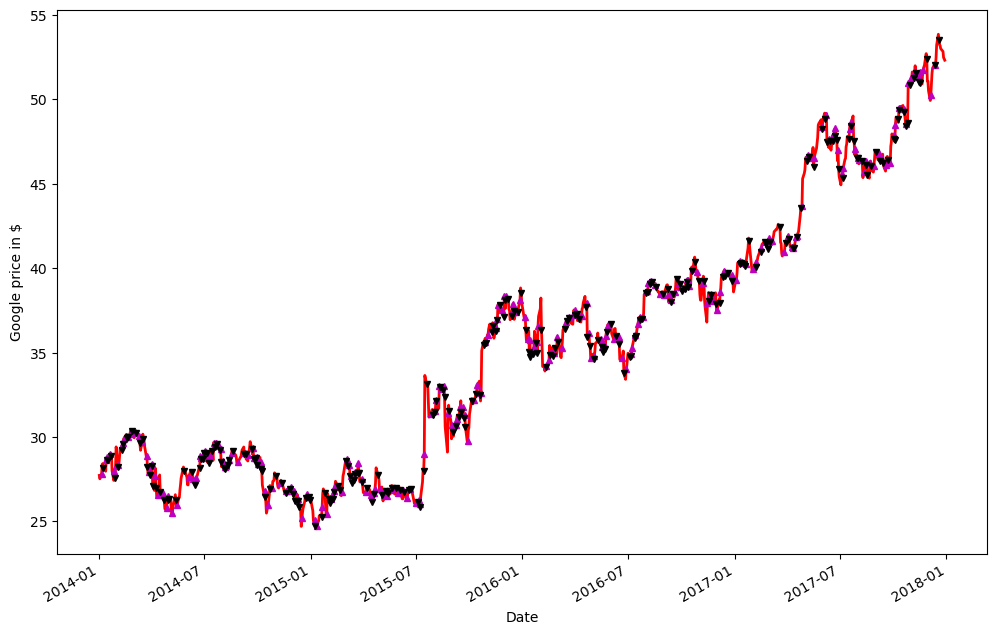

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='m')

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='k')

#plt.show()

In [8]:
# Set the initial capital
initial_capital= float(1000.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

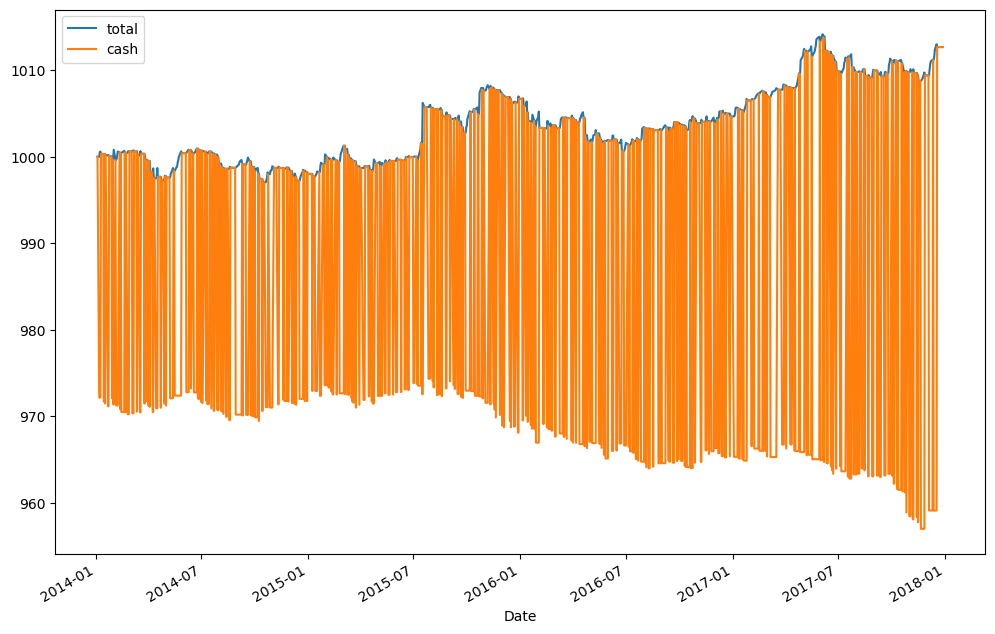

In [9]:
positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio[['total', 'cash']].plot(figsize=(12,8))
plt.show()

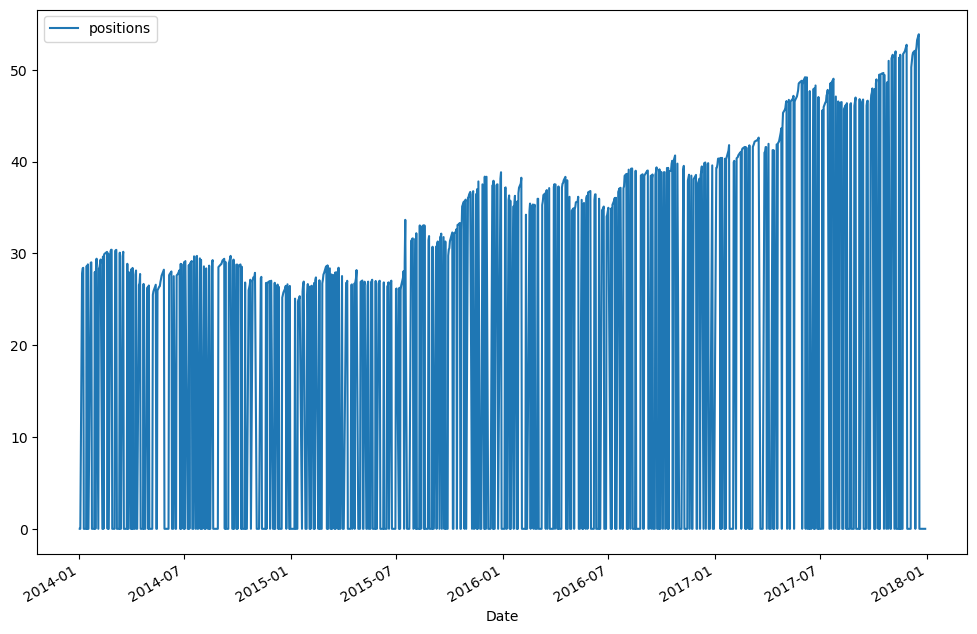

In [10]:
portfolio[['positions']].plot(figsize=(12,8))
plt.show()

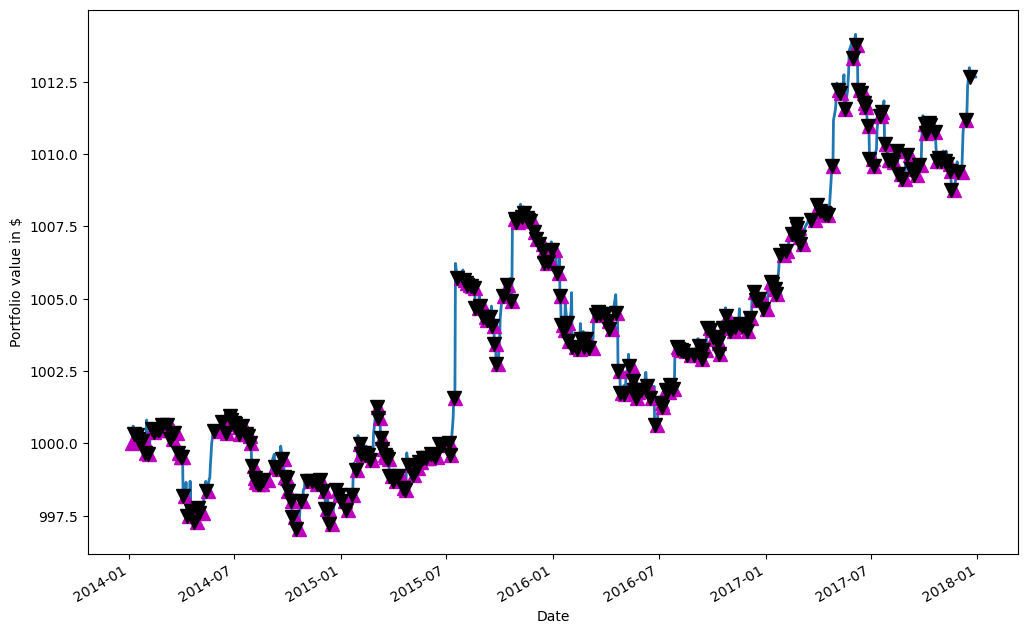

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[goog_data_signal.positions == 1.0].index,portfolio.total[goog_data_signal.positions == 1.0],'^', markersize=10, color='m')
ax1.plot(portfolio.loc[goog_data_signal.positions == -1.0].index,portfolio.total[goog_data_signal.positions == -1.0],'v', markersize=10, color='k')
plt.show()